# Portfolio1 - APIs and Data Cleaning
## Qiaoyu Wang

This week we looked at APIs, which could be a way we make requests for some specific pieces of data.

Recently I have been obsessed with the game Plants vs. Zombies, which made me wonder if I could get some data through the API to analyze plants and zombies. 

Luckily, I found it on the official website (https://pvz-2-api.vercel.app/docs) and it was free and open to use.

### 0 Import

In [1]:
import requests
import pandas as pd
import os  
import time
import urllib.request
from urllib.request import urlopen
from urllib.error import URLError, HTTPError
import numpy as np
import json

### 1 Request APIs 

In [2]:
api_url_plants = "https://pvz-2-api.vercel.app/api/plants"
# endpoint = "/search"
# url = api_url+endpoint
# #Query about child
# # params = "?query=Senko&type=2&category=pat&amount=5"
# params = "?amount=2"
#Stick them together into one long url and make the GET request
response_plants = requests.get(api_url_plants)
print(api_url_plants)
print("STATUS:", response_plants.status_code)

https://pvz-2-api.vercel.app/api/plants
STATUS: 200


In [3]:
plants = response_plants.json()
plants

['a.k.e.e.',
 'ail-mint',
 'aloe',
 'apple mortar',
 'arma-mint',
 'banana launcher',
 'blastberry vine',
 'bloomerang',
 'blooming heart',
 'blover',
 'bombard-mint',
 'bonk choy',
 'boom balloon flower',
 'bowling bulb',
 'cabbage-pult',
 'caulipower',
 'celery stalker',
 'chard guard',
 'cherry bomb',
 'chili bean',
 'citron',
 'coconut cannon',
 'cold snapdragon',
 'conceal-mint',
 'contain-mint',
 'dartichoke',
 'dazey chain',
 'draftodil',
 'dusk lobber',
 'e.m.peach',
 'electrici-tea',
 'enchant-mint',
 'endurian',
 'enforce-mint',
 'enlighten-mint',
 'escape root',
 'explode-o-nut',
 'explode-o-vine',
 'fila-mint',
 'fume-shroom',
 'garlic',
 'ghost pepper',
 'gloom vine',
 'gold bloom',
 'gold leaf',
 'grapeshot',
 'grave buster',
 'grimrose',
 'gumnut',
 'headbutter lettuce',
 'heath seeker',
 'hocus crocus',
 'holly barrier',
 'homing thistle',
 'hot potato',
 'iceberg lettuce',
 'imp pear',
 'infi-nut',
 'intensive carrot',
 "jack o' lantern",
 'jalapeno',
 'kernel-pult',
 

In [4]:
api_url_plants = "https://pvz-2-api.vercel.app/api/plants"
endpoint = '/chili bean'
url_plants_details = api_url_plants + endpoint
response = requests.get(url_plants_details)
if response.status_code == 200:
    # Extract and print the plant details from the response
    plant_data = response.json()
    # print(f"Plant: {plant}")
    print("Details:", plant_data)
else:
    print(f"Failed to retrieve details for plant: ")

Details: {'name': 'Chili Bean', 'cost': 50, 'recharge': 20, 'Usage': 'When eaten', 'special': 'Eating zombie is destroyed and releases stunning gas', 'family': 'Ail-mint', 'description': 'Chili Beans deliver a crippling bout of gastrointestinal distress.', 'image': '/assets/plants/Chili Bean.png'}


In [5]:
plant_detail_list = []

for plant in plants:
    endpoint = f'/{plant.lower()}'
    url_plants_details = api_url_plants + endpoint
    response = requests.get(url_plants_details)
    
    if response.status_code == 200:
        plant_data = response.json()
        plant_detail_list.append(plant_data)
    
    else:
        print(response.status_code)
        print(f"Failed to retrieve details for plant: {plant}")

plant_detail_list

[{'name': 'A.K.E.E.',
  'Sun cost': 175,
  'recharge': 5,
  'damage': '0/50/40/30 damage per shot (the first, second, third and fourth zombies)',
  'range': 'Lobbed/Multi-Hit',
  'family': 'Arma-mint',
  'description': 'A.K.E.E.s lob projectiles that bounce from zombie to zombie.',
  'image': '/assets/plants/A.K.E.E..png'},
 {'name': 'Ail-mint',
  'Sun cost': '0',
  'Recharge': '85 seconds',
  'Duration': '11 seconds',
  'Weakness': '(immune to poison effect)',
  'Family': 'Ail-mint',
  'image': '/assets/plants/Ail-mint.png'},
 {'name': 'Aloe',
  'Sun cost': '75',
  'Recharge': '20 seconds',
  'Toughness': 'Normal',
  'Family': 'Reinforce-mint',
  'image': '/assets/plants/Aloe.png'},
 {'name': 'Apple Mortar',
  'Sun cost': '250',
  'Recharge': '8 seconds',
  'Damage': '30 damage per shot',
  'Area': '3x3',
  'Range': 'Lobbed',
  'Family': 'Arma-mint',
  'image': '/assets/plants/Apple Mortar.png'},
 {'name': 'Arma-mint',
  'Sun cost': '0',
  'Recharge': '85 seconds',
  'Damage': '1200 d

In [6]:
df = pd.json_normalize(plant_detail_list)
df

,name,Sun cost,recharge,damage,range,family,description,image,Recharge,Duration,...,toughness,powerup,usage,special,120 damage per shot (blue bulb),Damage details,area,weakness,Range details,sun-production
0,A.K.E.E.,175,5.0,"0/50/40/30 damage per shot (the first, second,...",Lobbed/Multi-Hit,Arma-mint,A.K.E.E.s lob projectiles that bounce from zom...,/assets/plants/A.K.E.E..png,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ail-mint,0,NaN,NaN,NaN,NaN,NaN,/assets/plants/Ail-mint.png,85 seconds,11 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aloe,75,NaN,NaN,NaN,NaN,NaN,/assets/plants/Aloe.png,20 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Mortar,250,NaN,NaN,NaN,NaN,NaN,/assets/plants/Apple Mortar.png,8 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arma-mint,0,NaN,NaN,NaN,NaN,NaN,/assets/plants/Arma-mint.png,85 seconds,6 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Wasabi Whip,150,NaN,NaN,NaN,NaN,NaN,/assets/plants/Wasabi Whip.png,5 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Winter Melon,NaN,5.0,80,Lobbed,Winter-mint,Winter Melons do heavy damage and chills group...,/assets/plants/Winter Melon.png,NaN,NaN,...,NaN,NaN,NaN,Damaged enemies are also chilled,NaN,NaN,NaN,NaN,NaN,NaN
134,Winter-mint,0,NaN,NaN,NaN,NaN,NaN,/assets/plants/Winter-mint.png,85 seconds,10 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Witch Hazel,200,NaN,NaN,NaN,NaN,NaN,/assets/plants/Witch Hazel.png,30 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2 Clean the data

In [7]:
df.columns

Index(['name', 'Sun cost', 'recharge', 'damage', 'range', 'family',
       'description', 'image', 'Recharge', 'Duration', 'Weakness', 'Family',
       'Toughness', 'Damage', 'Area', 'Range', 'Usage', 'Special', 'cost',
       'toughness', 'powerup', 'usage', 'special',
       '120 damage per shot (blue bulb)', 'Damage details', 'area', 'weakness',
       'Range details', 'sun-production'],
      dtype='object')

There were lots of same columns but in different case letters, such as ‘Toughness’ and ‘toughness’, which really needed to be combined.

In [8]:
#Combine recharge columns
df['recharge'] = df['recharge'].combine_first(df['Recharge'])
# df.drop(columns=['Recharge'], inplace=True)
# df['recharge'] = df['recharge'].str.replace('seconds', '')

#Combine damage columns
df['damage'] = df['damage'].combine_first(df['Damage'])
df['Toughness'] = df['Toughness'].combine_first(df['toughness'])
df['Weakness'] = df['Weakness'].combine_first(df['weakness'])
df['Special'] = df['Special'].combine_first(df['special'])
df['Usage'] = df['Usage'].combine_first(df['usage'])
df['Range'] = df['Range'].combine_first(df['range'])
df['Area'] = df['Area'].combine_first(df['area'])
df['Family'] = df['Family'].combine_first(df['family'])
df['Sun cost'] = df['Sun cost'].combine_first(df['cost'])
df

,name,Sun cost,recharge,damage,range,family,description,image,Recharge,Duration,...,toughness,powerup,usage,special,120 damage per shot (blue bulb),Damage details,area,weakness,Range details,sun-production
0,A.K.E.E.,175,5.0,"0/50/40/30 damage per shot (the first, second,...",Lobbed/Multi-Hit,Arma-mint,A.K.E.E.s lob projectiles that bounce from zom...,/assets/plants/A.K.E.E..png,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ail-mint,0,85 seconds,NaN,NaN,NaN,NaN,/assets/plants/Ail-mint.png,85 seconds,11 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aloe,75,20 seconds,NaN,NaN,NaN,NaN,/assets/plants/Aloe.png,20 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Mortar,250,8 seconds,30 damage per shot,NaN,NaN,NaN,/assets/plants/Apple Mortar.png,8 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arma-mint,0,85 seconds,1200 dps,NaN,NaN,NaN,/assets/plants/Arma-mint.png,85 seconds,6 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Wasabi Whip,150,5 seconds,40 damage per shot,NaN,NaN,NaN,/assets/plants/Wasabi Whip.png,5 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,Winter Melon,500,5.0,80,Lobbed,Winter-mint,Winter Melons do heavy damage and chills group...,/assets/plants/Winter Melon.png,NaN,NaN,...,NaN,NaN,NaN,Damaged enemies are also chilled,NaN,NaN,NaN,NaN,NaN,NaN
134,Winter-mint,0,85 seconds,NaN,NaN,NaN,NaN,/assets/plants/Winter-mint.png,85 seconds,10 seconds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Witch Hazel,200,30 seconds,NaN,NaN,NaN,NaN,/assets/plants/Witch Hazel.png,30 seconds,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns_to_drop = ['Recharge', '120 damage per shot (blue bulb)', 'Damage', 'toughness', 'weakness', 'special', 'usage', 'range', 'area', 'family', 'cost']
new_df = df.drop(columns=columns_to_drop)
new_df

,name,Sun cost,recharge,damage,description,image,Duration,Weakness,Family,Toughness,Area,Range,Usage,Special,powerup,Damage details,Range details,sun-production
0,A.K.E.E.,175,5.0,"0/50/40/30 damage per shot (the first, second,...",A.K.E.E.s lob projectiles that bounce from zom...,/assets/plants/A.K.E.E..png,NaN,NaN,Arma-mint,NaN,NaN,Lobbed/Multi-Hit,NaN,NaN,NaN,NaN,NaN,NaN
1,Ail-mint,0,85 seconds,NaN,NaN,/assets/plants/Ail-mint.png,11 seconds,(immune to poison effect),Ail-mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aloe,75,20 seconds,NaN,NaN,/assets/plants/Aloe.png,NaN,NaN,Reinforce-mint,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apple Mortar,250,8 seconds,30 damage per shot,NaN,/assets/plants/Apple Mortar.png,NaN,NaN,Arma-mint,NaN,3x3,Lobbed,NaN,NaN,NaN,NaN,NaN,NaN
4,Arma-mint,0,85 seconds,1200 dps,NaN,/assets/plants/Arma-mint.png,6 seconds,NaN,Arma-mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Wasabi Whip,150,5 seconds,40 damage per shot,NaN,/assets/plants/Wasabi Whip.png,NaN,NaN,Enforce-mint,NaN,NaN,Close,NaN,"Resists cold and warms plants around it,(Immun...",NaN,NaN,NaN,NaN
133,Winter Melon,500,5.0,80,Winter Melons do heavy damage and chills group...,/assets/plants/Winter Melon.png,NaN,NaN,Winter-mint,NaN,NaN,Lobbed,NaN,Damaged enemies are also chilled,NaN,NaN,NaN,NaN
134,Winter-mint,0,85 seconds,NaN,NaN,/assets/plants/Winter-mint.png,10 seconds,NaN,Winter-mint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Witch Hazel,200,30 seconds,NaN,NaN,/assets/plants/Witch Hazel.png,NaN,(Cannot be turned into a mushroom),Enchant-mint,NaN,NaN,NaN,NaN,Prefers to target Wizard Zombies,NaN,NaN,NaN,NaN


And then I found that a lot of columns had lots of NaN values, which made these columns insufficient to be analyzed. 

In [10]:
nan_counts = new_df.isna().sum()
nan_counts

name                0
Sun cost            0
recharge            1
damage             61
description        93
image               0
Duration          125
Weakness          118
Family              9
Toughness          97
Area              105
Range              81
Usage              96
Special            77
powerup           133
Damage details    135
Range details     135
sun-production    136
dtype: int64

In [38]:
nan_columns_to_drop = ['Duration', 'Weakness', 'Area', 'powerup', 'Damage details', 'Range details', 'sun-production', 'description', 'Toughness', 'Range', 'Usage', 'Special','damage']
plant_df = new_df.drop(columns=nan_columns_to_drop)
plant_df

,name,Sun cost,recharge,image,Family
0,A.K.E.E.,175,5.0,/assets/plants/A.K.E.E..png,Arma-mint
1,Ail-mint,0,85 seconds,/assets/plants/Ail-mint.png,Ail-mint
2,Aloe,75,20 seconds,/assets/plants/Aloe.png,Reinforce-mint
3,Apple Mortar,250,8 seconds,/assets/plants/Apple Mortar.png,Arma-mint
4,Arma-mint,0,85 seconds,/assets/plants/Arma-mint.png,Arma-mint
...,...,...,...,...,...
132,Wasabi Whip,150,5 seconds,/assets/plants/Wasabi Whip.png,Enforce-mint
133,Winter Melon,500,5.0,/assets/plants/Winter Melon.png,Winter-mint
134,Winter-mint,0,85 seconds,/assets/plants/Winter-mint.png,Winter-mint
135,Witch Hazel,200,30 seconds,/assets/plants/Witch Hazel.png,Enchant-mint


The data types under the same column were also different. We could see str, int, and float. To make them the same data type, I used regex to clean them and just left integer for later analysis.

In [39]:
Suncost = df['Sun cost'].values
Suncost

array([175, '0', '75', '250', '0', '500', '175', 175, '150', 50, '0', 150,
       '350', '200', 100, '250 (300 in Chinese version)', '50', 75, 150,
       50, 350, 400, '150, 250 (China)', '0', '0', '225', '150', '100',
       '150 (200 in China)', 25, '125', '0', 100, '0', '0', '50', '50',
       '150', '0', '125', '50', '75, 100 (China)', '125', '0', 50, '150',
       0, '75', '125', '175', '125', '200', '150', '250', 0, 0, '0', 75,
       '100', '225', '125', 100, '175', 200, '75', 125, '25', '100', 50,
       'N/A', 325, '500,400 (China)', '50', '100',
       '75 (50 in Chinese version)', '175', '150,125 (China)', 125, '125',
       '150', 100, '0', 200, '150', 25, '175', '150', '175',
       '50 (25 in Chinese version)', '75', '75', '0', '150', '150', '125',
       150, '0', 200, 150, '75 (150 in Chinese Version)',
       '125,200 (Chinese version)', '50', '75', '50', 150, '0', '100',
       250, 100, 125, '150', 50, '50, 125 (China)', 0, '150', '225', 25,
       '50', '25', 50, '

In [42]:
import re

clean_suncost = []

for sun in Suncost:
    if isinstance(sun, str):
        clean_sun = re.sub(r',.*', '', re.sub(r'\(.*?\)', '', sun)).strip()
        if clean_sun.isdigit():
            clean_suncost.append(int(clean_sun))
        else:
            clean_suncost.append(clean_sun)
    elif isinstance(sun, int):
        clean_suncost.append(sun)

clean_suncost

[175,
 0,
 75,
 250,
 0,
 500,
 175,
 175,
 150,
 50,
 0,
 150,
 350,
 200,
 100,
 250,
 50,
 75,
 150,
 50,
 350,
 400,
 150,
 0,
 0,
 225,
 150,
 100,
 150,
 25,
 125,
 0,
 100,
 0,
 0,
 50,
 50,
 150,
 0,
 125,
 50,
 75,
 125,
 0,
 50,
 150,
 0,
 75,
 125,
 175,
 125,
 200,
 150,
 250,
 0,
 0,
 0,
 75,
 100,
 225,
 125,
 100,
 175,
 200,
 75,
 125,
 25,
 100,
 50,
 'N/A',
 325,
 500,
 50,
 100,
 75,
 175,
 150,
 125,
 125,
 150,
 100,
 0,
 200,
 150,
 25,
 175,
 150,
 175,
 50,
 75,
 75,
 0,
 150,
 150,
 125,
 150,
 0,
 200,
 150,
 75,
 125,
 50,
 75,
 50,
 150,
 0,
 100,
 250,
 100,
 125,
 150,
 50,
 50,
 0,
 150,
 225,
 25,
 50,
 25,
 50,
 150,
 125,
 25,
 75,
 300,
 75,
 150,
 0,
 200,
 50,
 125,
 50,
 150,
 500,
 0,
 200,
 200]

In [35]:
Recharge = df['recharge'].values
Recharge

array([5.0, '85 seconds', '20 seconds', '8 seconds', '85 seconds',
       '5 seconds', '10 seconds', 5.0, '5 seconds', 5.0, '85 seconds',
       5.0, '5', '5 seconds', 5.0, '45 seconds', '15 seconds', 15.0, 35.0,
       20.0, 5.0, 5.0, '5 seconds', '85 seconds', '85', '8.5 seconds',
       '5 seconds', '5 seconds', '10 seconds', 25.0, '15 seconds',
       '85 seconds', 15.0, '85 seconds', '85 seconds', '20 seconds',
       '10 seconds', '10 seconds', '85 seconds', '5 seconds',
       '20 seconds', '15 seconds', '5 seconds', '75 seconds', 30.0,
       '35 seconds', 10.0, '20 seconds', '12', '7 seconds', '20',
       '20 seconds', '15 seconds', '15 seconds', 10.0, 20.0, '5 seconds',
       15.0, '20 seconds', '20 seconds', '35 seconds', 5.0, '15 seconds',
       5.0, '15 seconds', 5.0, '5 seconds', '15 seconds', 5.0, nan, 5.0,
       '5 seconds', '10 seconds (Mediocre in China)', '10 seconds',
       '5 seconds', '7 seconds', '5 seconds', 5.0, '5', '15 seconds', 5.0,
       '85 seconds',

In [44]:
# Using list comprehension to clean "recharge" column

clean_recharge = [
    int(re.sub(r'\D', '', re.sub(r'\(.*?\)', '', re.sub(r',.*', '', rec)).strip()))
    if isinstance(rec, str) and any(char.isdigit() for char in rec)
    else rec
    for rec in Recharge
]

clean_recharge

[5.0,
 85,
 20,
 8,
 85,
 5,
 10,
 5.0,
 5,
 5.0,
 85,
 5.0,
 5,
 5,
 5.0,
 45,
 15,
 15.0,
 35.0,
 20.0,
 5.0,
 5.0,
 5,
 85,
 85,
 85,
 5,
 5,
 10,
 25.0,
 15,
 85,
 15.0,
 85,
 85,
 20,
 10,
 10,
 85,
 5,
 20,
 15,
 5,
 75,
 30.0,
 35,
 10.0,
 20,
 12,
 7,
 20,
 20,
 15,
 15,
 10.0,
 20.0,
 5,
 15.0,
 20,
 20,
 35,
 5.0,
 15,
 5.0,
 15,
 5.0,
 5,
 15,
 5.0,
 nan,
 5.0,
 5,
 10,
 10,
 5,
 7,
 5,
 5.0,
 5,
 15,
 5.0,
 85,
 20.0,
 30,
 20.0,
 60,
 5,
 5,
 25,
 5,
 'Fast',
 5,
 20,
 12,
 10,
 5.0,
 85,
 5.0,
 5.0,
 5,
 5,
 10,
 5,
 15,
 5.0,
 20,
 25,
 5.0,
 5.0,
 5.0,
 5,
 20.0,
 20,
 20.0,
 5,
 10,
 20.0,
 20,
 5,
 5.0,
 20,
 20.0,
 20,
 20,
 5.0,
 60,
 7,
 10.0,
 5,
 55,
 10.0,
 20.0,
 5,
 5.0,
 85,
 30,
 20]

In [43]:
plant_df['Sun cost'] = clean_suncost
plant_df['recharge'] = clean_recharge
plant_df

,name,Sun cost,recharge,image,Family
0,A.K.E.E.,175,5.0,/assets/plants/A.K.E.E..png,Arma-mint
1,Ail-mint,0,85,/assets/plants/Ail-mint.png,Ail-mint
2,Aloe,75,20,/assets/plants/Aloe.png,Reinforce-mint
3,Apple Mortar,250,8,/assets/plants/Apple Mortar.png,Arma-mint
4,Arma-mint,0,85,/assets/plants/Arma-mint.png,Arma-mint
...,...,...,...,...,...
132,Wasabi Whip,150,5,/assets/plants/Wasabi Whip.png,Enforce-mint
133,Winter Melon,500,5.0,/assets/plants/Winter Melon.png,Winter-mint
134,Winter-mint,0,85,/assets/plants/Winter-mint.png,Winter-mint
135,Witch Hazel,200,30,/assets/plants/Witch Hazel.png,Enchant-mint


In [46]:
for suns in plant_df['Sun cost']:
    if isinstance(suns, str):
        plant_df = plant_df[~plant_df['Sun cost'].apply(lambda x: isinstance(x, str))]

In [68]:
for reg in plant_df['recharge']:
    if isinstance(reg, str):
        plant_df = plant_df[~plant_df['recharge'].apply(lambda x: isinstance(x, str))]

### 3 Data Analysis

Finally I finished the data cleaning and calculated the ‘mean’, ‘median’ and ‘mode’ numbers out. 

In [47]:
mean = plant_df["Sun cost"].mean()
print(mean)
median = plant_df["Sun cost"].median()
print(median)
mode = plant_df["Sun cost"].mode()
print(mode)

118.56617647058823
112.5
0    150
Name: Sun cost, dtype: object


In [69]:
mean = plant_df["recharge"].mean()
print(mean)
median = plant_df["recharge"].median()
print(median)
mode = plant_df["recharge"].mode()
print(mode)

20.762962962962963
10.0
0    5.0
Name: recharge, dtype: object


What I found interesting was that one of the mode numbers in sun cost showed 0, which seemed like different from my memory! So I printed them out to have a look.

In [48]:
mode_zero = plant_df[plant_df["Sun cost"] == 0]
mode_zero

,name,Sun cost,recharge,image,Family
1,Ail-mint,0,85,/assets/plants/Ail-mint.png,Ail-mint
4,Arma-mint,0,85,/assets/plants/Arma-mint.png,Arma-mint
10,Bombard-mint,0,85,/assets/plants/Bombard-mint.png,Bombard-mint
23,Conceal-mint,0,85,/assets/plants/Conceal-mint.png,Conceal-mint
24,Contain-mint,0,85,/assets/plants/Contain-mint.png,Contain-mint
31,Enchant-mint,0,85,/assets/plants/Enchant-mint.png,Enchant-mint
33,Enforce-mint,0,85,/assets/plants/Enforce-mint.png,Enforce-mint
34,Enlighten-mint,0,85,/assets/plants/Enlighten-mint.png,Enlighten-mint
38,Fila-mint,0,85,/assets/plants/Fila-mint.png,Fila-mint
43,Gold Bloom,0,75,/assets/plants/Gold Bloom.png,Enlighten-mint


In [62]:
from PIL import Image
import io
import matplotlib.pyplot as plt
from matplotlib.image import imread

C:\Users\YYY70\AppData\Local\Temp\ipykernel_29468\2187238380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mode_zero['image'] = mode_zero['image'].str.replace('/assets/plants/', '')


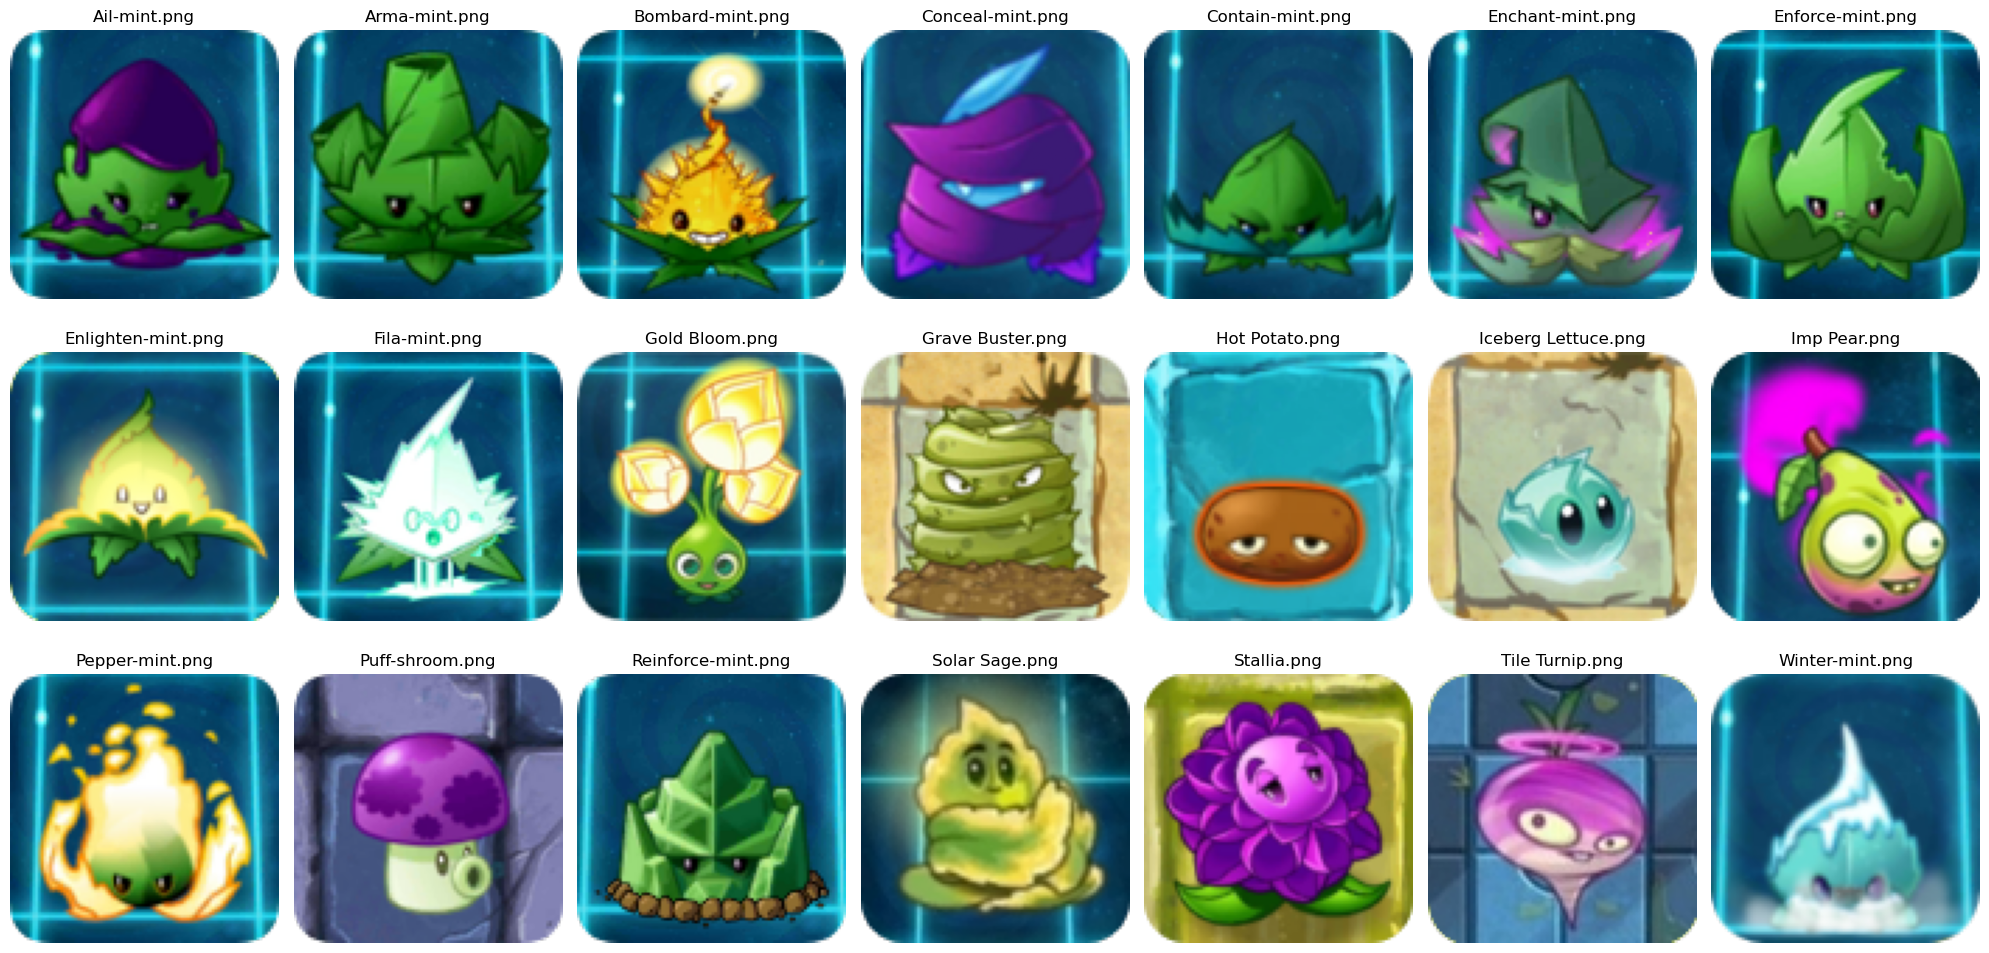

In [66]:
#Download the plant images from https://github.com/code-cracked/plants-vs-zombies-api/tree/main
plant_images = "plants"
#Make sure the name of images in column are matched with those in folder
mode_zero['image'] = mode_zero['image'].str.replace('/assets/plants/', '')

# Using Chatgpt to generate the code structure and modify it
def display_specific_images(plant_images, mode_zero, image):
    # Get the list of image filenames from the image folder
    image_files = os.listdir(plant_images)

    fig, axes = plt.subplots(3, 7, figsize=(20, 10))
    
    axes = axes.flatten()

    for i, image_filename in enumerate(mode_zero[image]):
        if image_filename in image_files:
            img_path = os.path.join(plant_images, image_filename)
            img = imread(img_path)
            axes[i].imshow(img)
            axes[i].axis('off') 
            axes[i].set_title(image_filename)  
        else:
            print(f"{image_filename} not found in the folder.")
    plt.tight_layout()
    plt.show()

display_specific_images(plant_images, mode_zero, 'image')